# 0.0. Imports

In [3]:
import pandas as pd
import numpy as np

import inflection

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

import datetime

### 0.1. Helper Functions

### 0.2. Loading Data

In [4]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory = False)
df_store_raw = pd.read_csv('data/store.csv', low_memory = False)

# merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how = 'left', on = 'Store')

In [5]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
164753,849,5,2015-03-06,9869,989,1,1,0,0,c,c,5000.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0. Descrição dos dados

In [6]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [7]:
old_cols= df1.columns
snakecase = lambda x: inflection.underscore( x )
new_cols = list ( map( snakecase, old_cols))
# rename
df1.columns = new_cols

### 1.2. Data Dimensions

In [8]:
print('Number of rows: ', df1.shape[0])
print('Number of columns: ', df1.shape[1])

Number of rows:  1017209
Number of columns:  18


### 1.3. Data Types

In [9]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4. Check NA

In [10]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5. Fillout NA

In [11]:
# competition_distance
print("Max distance: ", df1['competition_distance'].max())
df1['competition_distance'] = df1['competition_distance'].fillna(200000)
print("Max distance: ", df1['competition_distance'].max())

Max distance:  75860.0
Max distance:  200000.0


In [12]:
# competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if np.isnan(x['competition_open_since_month']) == True else x['competition_open_since_month'], axis = 1)

In [13]:
# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if np.isnan(x['competition_open_since_year']) == True else x['competition_open_since_year'], axis = 1)

In [14]:
# promo2_since_week
print("Distribution of promo 2: \n", df1['promo2'].value_counts())
print("Nan values in promo_2_since_week: ", len(df1['promo2_since_week'][df1['promo2_since_week'].isna() == True]))
print("Stores that didn't have promo 2 and has 'Nan' values in 'promo_2_since_week': ", len(df1[['promo2','promo2_since_week']][(df1['promo2_since_week'].isna() == True) & (df1['promo2'] == 0)]))
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if np.isnan(x['promo2_since_week']) == True else x['promo2_since_week'], axis = 1)

Distribution of promo 2: 
 1    509178
0    508031
Name: promo2, dtype: int64
Nan values in promo_2_since_week:  508031
Stores that didn't have promo 2 and has 'Nan' values in 'promo_2_since_week':  508031


In [15]:
# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if np.isnan(x['promo2_since_year']) == True else x['promo2_since_year'], axis = 1)

In [16]:
# promo_interval
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df1['promo_interval'].fillna(0, inplace = True)
df1['month_map'] = df1['date'].dt.month.apply(lambda x: months[x])
df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)

In [17]:
df1.sample(8).T

,18248,309350,421785,908766,977575,454399,834419,559475
store,409,48,1101,827,506,265,70,531
day_of_week,3,2,4,1,2,2,4,6
date,2015-07-15 00:00:00,2014-10-14 00:00:00,2014-06-19 00:00:00,2013-04-08 00:00:00,2013-02-05 00:00:00,2014-05-20 00:00:00,2013-06-13 00:00:00,2014-02-15 00:00:00
sales,6545,2717,10055,12681,10262,6633,4881,4192
customers,604,351,1011,1542,1004,607,577,525
open,1,1,1,1,1,1,1,1
promo,1,0,1,1,1,1,0,0
state_holiday,0,0,0,0,0,0,0,0
school_holiday,0,1,0,0,0,0,0,0
store_type,d,a,d,a,a,a,c,a


In [18]:
pd.DataFrame([df1.isna().sum(), df1.dtypes]).T

,0,1
store,0,int64
day_of_week,0,int64
date,0,datetime64[ns]
sales,0,int64
customers,0,int64
open,0,int64
promo,0,int64
state_holiday,0,object
school_holiday,0,int64
store_type,0,object


### 1.6. Change Types

In [19]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] =  df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.7. Descriptive Statistics

In [20]:
df2 = df1.copy()
num_attributes = df2.select_dtypes(include = ['int32','int64','float64'])
cat_attributes = df2.select_dtypes(exclude = ['int32','int64','float64','datetime64[ns]'])

In [21]:
# Central Tendency: mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T
# Dispersion : std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concatenate
stats = pd.concat([ct1,ct2,d1,d2,d3,d4,d5,d6]).T.reset_index()
stats.columns = ['attributes','mean','median','std','min','max','range','skew','kurtosis']
stats

,attributes,mean,median,std,min,max,range,skew,kurtosis
0,store,558.429727,558.0,321.908493,1.0,1115.0,1114.0,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.997390,1.0,7.0,6.0,0.001593,-1.246873
2,sales,5773.818972,5744.0,3849.924283,0.0,41551.0,41551.0,0.641460,1.778375
3,customers,633.145946,609.0,464.411506,0.0,7388.0,7388.0,1.598650,7.091773
4,open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
5,promo,0.381515,0.0,0.485758,0.0,1.0,1.0,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
7,competition_distance,5935.442677,2330.0,12547.646829,20.0,200000.0,199980.0,10.242344,147.789712
8,competition_open_since_month,6.786849,7.0,3.311085,1.0,12.0,11.0,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,5.515591,1900.0,2015.0,115.0,-7.235657,124.071304


In [22]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

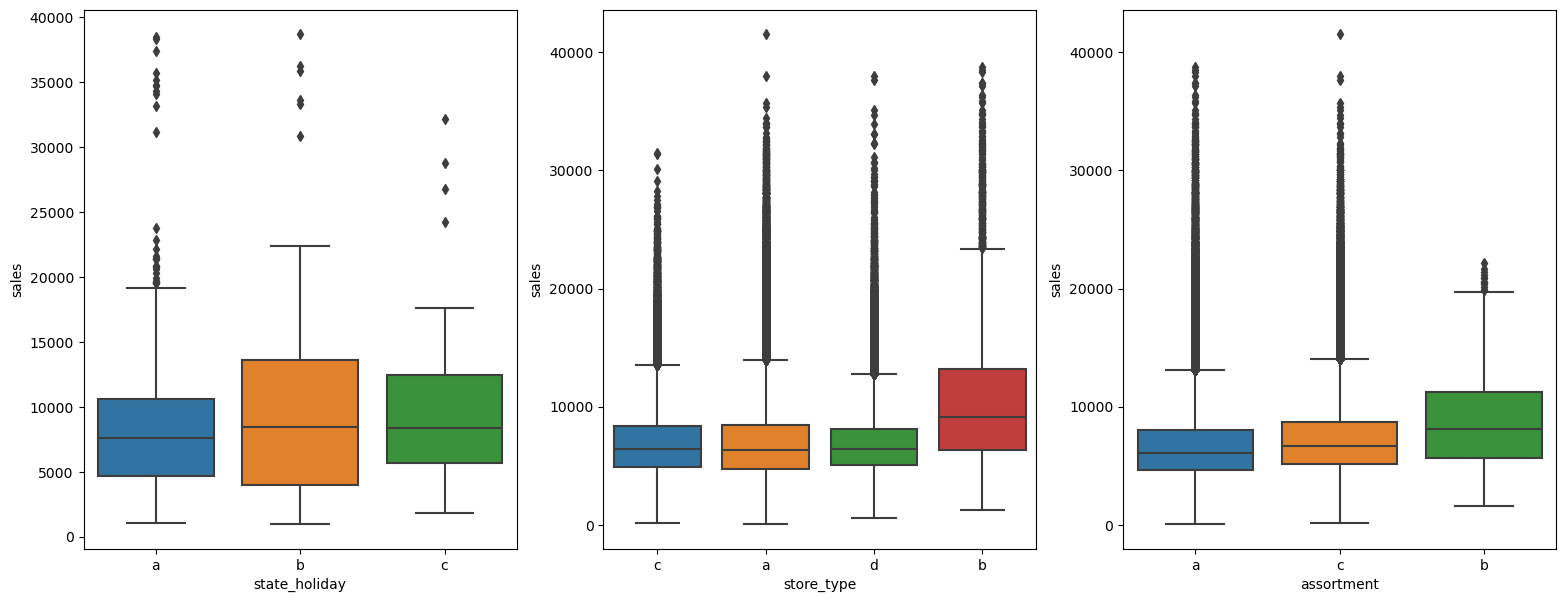

In [23]:
# Tamanho
Figura, Eixo = plt.subplots(figsize=(19, 7))

plt.subplot(1, 3 ,1)
sns.boxplot(x = 'state_holiday',y = 'sales', data = df2[(df2['sales'] != 0) & (df2['state_holiday'] != '0')])
plt.subplot (1, 3, 2)
sns.boxplot(x = 'store_type',y = 'sales', data = df2[df2['sales'] != 0])
plt.subplot (1, 3, 3)
sns.boxplot(x = 'assortment',y = 'sales', data = df2[df2['sales'] != 0])

# 2.0. Feature Engineering

In [24]:
df3 = df2.copy()
Image('Img\mind_map_hypotesis.png', width = 800, height = 500)

FileNotFoundError: No such file or directory: 'mind_map_hypotesis.png'

FileNotFoundError: No such file or directory: 'mind_map_hypotesis.png'

<IPython.core.display.Image object>

### 2.1. Criação das Hipóteses

#### 2.2.1. Hipóteses Loja

- Lojas com maior quadro de funcionários deveriam vender mais

- Lojas com maior estoque deveriam vender mais

- Lojas de maior porte deveriam vender mais

- Lojas de menor porte deveriam vender menos

- Lojas com maior sortimento deveriam vender mais

- Lojas com competidores mais próximos deveriam vender menos

- Lojas com competidores mais distantes deveriam vender mais

#### 2.2.2. Hipóteses produto

- Lojas que investem mais em marketing deveriam vender mais

- Lojas que expõem mais os produtos na vitrine deveriam vender mais

- Lojas que tem preços menores deveriam vender mais

- Lojas que tem preços menores por mais tempo deveriam vender mais

- Lojas com promoções ativas por mais tempo deveriam vender mais

- Lojas com mais dias de promoção deveriam vender mais

- Lojas com promoções consecutivas deveriam vender mais

#### 2.2.3. Hipóteses Tempo

- Lojas abertas dirante o Natala deveriam vender mais

- Lojas deveriam vender mais ao longo dos anos

- Lojas deveriam vender mais no segundo semertre do ano

- Lojas deveriam vender mais depois do dia 10 de cada mês

- Lojas deveriam vender menos aos finais de semana

- Lojas deveriam vender menos durante feriados escolares

### 2.2. Lista de hipóteses finais

- Lojas com maior sortimento deveriam vender mais

- Lojas com competidores mais próximos deveriam vender menos

- Lojas com competidores mais distantes deveriam vender mais

- Lojas com promoções ativas por mais tempo deveriam vender mais

- Lojas com mais dias de promoção deveriam vender mais

- Lojas com promoções consecutivas deveriam vender mais

- Lojas abertas dirante o Natala deveriam vender mais

- Lojas deveriam vender mais ao longo dos anos

- Lojas deveriam vender mais no segundo semertre do ano

- Lojas deveriam vender mais depois do dia 10 de cada mês

- Lojas deveriam vender menos aos finais de semana

- Lojas deveriam vender menos durante feriados escolares

### 2.3. Feature Engineering

In [ ]:
df3 = df2.copy()
# year
df3['year'] = df3['date'].dt.year
# month
df3['month'] = df3['date'].dt.month
# day
df3['day'] = df3['date'].dt.day
# week of year
df3['week_of_year'] = df3['date'].dt.weekofyear
# year week
df3['year_week'] = df3['date'].dt.strftime('%Y-%W')

# competition since
df3['competition_since'] = df3.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
df3['competition_time_month'] = ((df3['date'] - df3['competition_since']) / 30).apply(lambda x: x.days).astype(int)
# promo since
df3['promo_since'] = df3['promo2_since_year'].astype(str) + '-' + df3['promo2_since_week'].astype(str)
df3['promo_since'] = df3['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
df3['promo_time_week'] = ((df3['date'] - df3['promo_since']) / 7).apply(lambda x: x.days).astype(int)
# assortment
dict_assort = {'a': 'basic', 'b': 'extra','c': 'extended'}
df3['assortment'] = df3['assortment'].apply(lambda x: dict[x])
# state holiday
dict_holiday = {'0': 'regular_day', 'a':'public_holiday','b': 'easter','c': 'christmas'}
df3['state_holiday'] = df3['state_holiday'].apply(lambda x: dict_holiday[x])

C:\Users\igor\AppData\Local\Temp\ipykernel_8904\300998183.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df3['week_of_year'] = df3['date'].dt.weekofyear


In [ ]:
df3.sample(5).T

,883412,388349,603627,137367,745655
store,3,595,83,223,506
day_of_week,2,2,1,1,7
date,2013-04-30 00:00:00,2014-07-22 00:00:00,2014-01-06 00:00:00,2015-03-30 00:00:00,2013-09-01 00:00:00
sales,11641,11045,5917,14159,0
customers,1129,1426,464,1008,0
open,1,1,1,1,0
promo,1,0,1,1,0
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,0,1,1,1,0
store_type,a,c,a,d,a


# 3.0. Filtragem de Variáveis

In [25]:
df4 = df3.copy()

### 3.1. Filtragem das linhas

In [27]:
df4 = df4[(df4['open'] != 0) & (df4['sales'] > 0)]

### 3.2 Seleção das colunas

In [30]:
cols_drop = ["customers","open","promo_interval","month_map"]
df4 =df4.drop(cols_drop, axis = 1)